In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping


In [0]:
np.random.seed(7)
rn.seed(22)
tf.set_random_seed(21)


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.astype('float32')
x_test =x_test.astype('float32')
x_train /= 255
x_test /= 255
number_of_classes = 10

In [0]:
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [0]:
inputs = Input(shape=(32, 32, 3))
x = BatchNormalization()(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

In [0]:
model = Model(inputs, outputs)

In [0]:
adam = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)  # beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 32)        128       
__________

In [52]:
earlystopping = EarlyStopping(monitor='val_acc', patience=3)

model.fit(x_train, y_train, validation_split=0.1,
              shuffle=True, batch_size=32,
          epochs=50, callbacks=[earlystopping])

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 45s 1ms/step - loss: 1.6399 - acc: 0.3967 - val_loss: 1.4849 - val_acc: 0.4782
Epoch 2/50
45000/45000 [==============================] - 42s 936us/step - loss: 1.2554 - acc: 0.5512 - val_loss: 1.1039 - val_acc: 0.6134
Epoch 3/50
45000/45000 [==============================] - 42s 924us/step - loss: 1.0839 - acc: 0.6162 - val_loss: 0.9280 - val_acc: 0.6830
Epoch 4/50
45000/45000 [==============================] - 42s 925us/step - loss: 0.9693 - acc: 0.6568 - val_loss: 0.8113 - val_acc: 0.7184
Epoch 5/50
45000/45000 [==============================] - 42s 928us/step - loss: 0.8862 - acc: 0.6884 - val_loss: 0.7970 - val_acc: 0.7204
Epoch 6/50
45000/45000 [==============================] - 42s 928us/step - loss: 0.8096 - acc: 0.7153 - val_loss: 0.8155 - val_acc: 0.7292
Epoch 7/50
45000/45000 [==============================] - 42s 927us/step - loss: 0.7562 - acc: 0.7340 - val_loss: 0.695

In [53]:
model.evaluate(x_test, y_test, verbose=2)


[0.5906804538726806, 0.81]

In [0]:
model.save('model_cifar10.h5')

In [0]:
img_path = "military-raptor-582888_640.jpg"

In [0]:
img = image.load_img(img_path, target_size=(32,32))

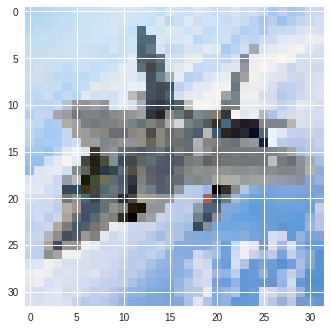

In [71]:
plt.imshow(img)
plt.show()

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [0]:
classes = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [73]:
prediction = model.predict(x)
#prediction = np_utils.to_categorical(prediction)
#print(classes[prediction(0)])
print(prediction)

[[9.9816918e-01 2.9563316e-10 3.6799465e-05 7.7521054e-06 1.7750830e-03
  6.0884777e-09 1.0941272e-07 6.1034866e-06 4.9542878e-06 5.4685939e-10]]


In [61]:
pr = np.argmax(prediction) 
if pr == 0:
  print("It's a plane")
if pr == 1:
  print("It's a car")
if pr == 2:
  print("It's a bird")
if pr == 3:
  print("It's a cat")
if pr == 4:
  print("It's a deer") 
if pr == 5:
  print("It's a dog")
if pr == 6:
  print("It's a frog")
if pr == 7:
  print("It's a horse")
if pr == 8:
  print("It's a ship")
if pr == 9:
  print("It's a truck")   

It's a plane


In [76]:
img_path2 = "car-49278_640.jpg"
img2 = image.load_img(img_path2, target_size=(32,32))
x = image.img_to_array(img2)
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
pr = np.argmax(prediction)
if pr == 0:
  print("It's a plane")
if pr == 1:
  print("It's a car")
if pr == 2:
  print("It's a bird")
if pr == 3:
  print("It's a cat")
if pr == 4:
  print("It's a deer") 
if pr == 5:
  print("It's a dog")
if pr == 6:
  print("It's a frog")
if pr == 7:
  print("It's a horse")
if pr == 8:
  print("It's a ship")
if pr == 9:
  print("It's a truck")   
    

It's a car


It's a car


[[2.85237184e-05 1.72491002e-06 2.66816560e-08 1.22360973e-06
  2.16056488e-08 1.03414124e-10 2.57201350e-06 5.17045712e-11
  9.99961376e-01 4.48411402e-06]]
It's a ship


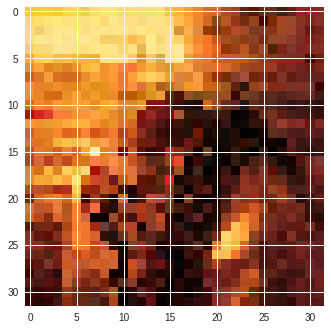

In [74]:
img_path = "horses-back-587609_640.jpg"
img = image.load_img(img_path, target_size=(32,32))
plt.imshow(img)
plt.show()


In [75]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
print(prediction)
pr = np.argmax(prediction)
if pr == 0:
  print("It's a plane")
if pr == 1:
  print("It's a car")
if pr == 2:
  print("It's a bird")
if pr == 3:
  print("It's a cat")
if pr == 4:
  print("It's a deer") 
if pr == 5:
  print("It's a dog")
if pr == 6:
  print("It's a frog")
if pr == 7:
  print("It's a horse")
if pr == 8:
  print("It's a ship")
if pr == 9:
  print("It's a truck")

[[9.8648734e-06 5.4707780e-06 1.1389138e-02 9.4323605e-02 1.2762956e-02
  3.7239414e-01 5.0153136e-01 7.2588860e-03 1.3044511e-04 1.9409941e-04]]
It's a frog
